In [1]:
# imorting necessary libraries
import os, shutil
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,img_to_array,array_to_img

In [2]:
# Creating folder structure
base_dir = r'C:\Users\Honey\Desktop\Keras\CNN_Applications\Cats and Dogs\cats_and_dogs_small_augmentation'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [3]:
# copying files from original dataset to respective folders
original_dataset_dir = r'C:\Users\Honey\Desktop\Keras\CNN_Applications\Cats and Dogs\dogs-vs-cats\train\train'
files = ['cat.{}.jpg'.format(i) for i in range(1000)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(train_cats_dir,file)
    shutil.copyfile(source,destination)
    
files = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(validation_cats_dir,file)
    shutil.copyfile(source,destination)
    
files = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(test_cats_dir,file)
    shutil.copyfile(source,destination)
    
files = ['dog.{}.jpg'.format(i) for i in range(1000)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(train_dogs_dir,file)
    shutil.copyfile(source,destination)
    
files = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(validation_dogs_dir,file)
    shutil.copyfile(source,destination)
    
files = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for file in files:
    source = os.path.join(original_dataset_dir,file)
    destination = os.path.join(test_dogs_dir,file)
    shutil.copyfile(source,destination)

In [4]:
#  network architecture
# Sequential class used only for linear stacks of layers
# functional API used for directed acyclic graphs of layers
model = models.Sequential()
# Convolution layer with 32 filters and 3X3 kernel
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
# Maxpooling layer
model.add(layers.MaxPooling2D((2,2)))
# Convolution layer with 64 filters and 3X3 kernel
model.add(layers.Conv2D(64,(3,3),activation='relu'))
# Maxpooling layer
model.add(layers.MaxPooling2D((2,2)))
# Convolution layer with 128 filters and 3X3 kernel
model.add(layers.Conv2D(128,(3,3),activation='relu'))
# Maxpooling layer
model.add(layers.MaxPooling2D((2,2)))
# Convolution layer with 128 filters and 3X3 kernel
model.add(layers.Conv2D(128,(3,3),activation='relu'))
# Maxpooling layer
model.add(layers.MaxPooling2D((2,2)))
# Flattening layer
model.add(layers.Flatten())
# Dropout layer to avoid overfitting
model.add(layers.Dropout(0.5))
# Fully connected layer with 512 filters
model.add(layers.Dense(512,activation='relu'))
# Output layer layer with 1 class
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
# Setting up a data augmentation (to avoid over fitting) configuration via ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

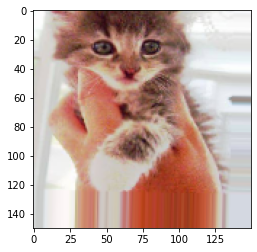

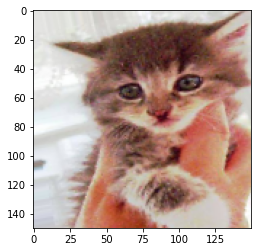

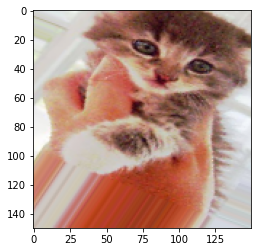

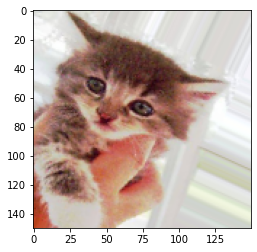

In [6]:
# Displaying some randomly augmented training images
filenames = [os.path.join(train_cats_dir,filename) for filename in os.listdir(train_cats_dir)]
img_path = filenames[3]
img = load_img(img_path, target_size=(150,150))
x = img_to_array(img)
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i+=1
    if i %4 == 0:
        break
plt.show()

In [7]:
# compilation step
# binary crossentropy for a two-class classification problem
# categorical crossentropy for a many-class classification problem
# meansquared error for a regression problem
# connectionist temporal classification for a sequence-learning problem
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [8]:
# Using ImageDataGenerator to read images from directories
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
validation_generator = train_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=32,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# Fitting the model using a batch generator
history = model.fit(train_generator, epochs=30, 
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/30
63/63 [==============================] - 45s 706ms/step - loss: 0.6784 - acc: 0.5680 - val_loss: 0.6659 - val_acc: 0.5930
Epoch 2/30
63/63 [==============================] - 33s 526ms/step - loss: 0.6675 - acc: 0.5980
Epoch 3/30
63/63 [==============================] - 33s 520ms/step - loss: 0.6571 - acc: 0.5925
Epoch 4/30
63/63 [==============================] - 33s 525ms/step - loss: 0.6549 - acc: 0.6190
Epoch 5/30
63/63 [==============================] - 33s 527ms/step - loss: 0.6354 - acc: 0.6415
Epoch 6/30
63/63 [==============================] - 34s 538ms/step - loss: 0.6252 - acc: 0.6525
Epoch 7/30
63/63 [==============================] - 34s 536ms/step - loss: 0.6113 - acc: 0.6670
Epoch 8/30
63/63 [==============================] - 34s 535ms/step - loss: 0.6128 - acc: 0.6515
Epoch 9/30
63/63 [==============================] - 33s 529ms/step - loss: 0.5826 - acc: 0.6905
Epoch 10/30
63/63 [==============================] - 33s 528ms/step - loss: 0.5908 - acc: 0.6900
Ep

In [15]:
model.save('cats_and_dogs_small_2.h5')

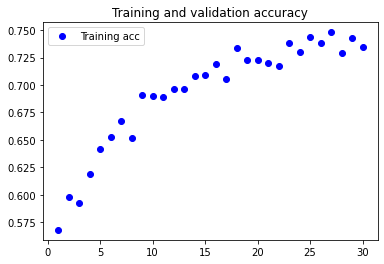

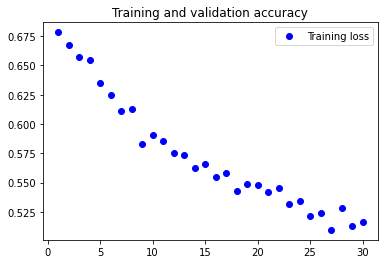

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
# plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
# plt.plot(epochs,val_loss,'b',label='Valiation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.show()